## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and understanding the data

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking info of the dataset

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# Checking the shape of dataset

lead.shape

(9240, 37)

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 3. Data Cleaning

In [6]:
# Converting all the values to lower case as python is case sensitive 

lead = lead.applymap(lambda s:s.lower() if type(s)== str else s)

In [7]:
# Replacing "Select" with "NaN"

lead = lead.replace('select',np.nan)

In [8]:
# Checking for unique values in the columns if there is only 1 unique value then we can drop that column as it wont affect

lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping the columns with only 1 unique value

lead_1 = lead.drop(['Magazine','Prospect ID','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
# Checking for null values in dataset and finding the percentage

lead_1.isnull().sum()*0.01

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.37
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.37
Last Activity                                     1.03
Country                                          24.61
Specialization                                   33.80
How did you hear about X Education               72.50
What is your current occupation                  26.90
What matters most to you in choosing a course    27.09
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# We will drop the columns which have more than 35% of missing data as they are no longer useful

lead_2 = lead_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)

In [12]:
# Checking the missing value percentage after dropping columns

lead_2.isnull().sum()*0.01

Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.37
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.37
Last Activity                                     1.03
Country                                          24.61
Specialization                                   33.80
What is your current occupation                  26.90
What matters most to you in choosing a course    27.09
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

***From the above results we can clearly see that there are still some columns with high % of missing values. We can't drop those columns as they are important for our analysis and we could lose valuable information if dropped. Hence, we impute the 'NaN' values with 'unknown' and then there won't be any null values.***

In [13]:
lead_2['Specialization'] = lead_2['Specialization'].fillna('unknown') 
lead_2['What matters most to you in choosing a course'] = lead_2['What matters most to you in choosing a course'].fillna('unknown')
lead_2['Country'] = lead_2['Country'].fillna('unknown')
lead_2['What is your current occupation'] = lead_2['What is your current occupation'].fillna('unknown')

In [14]:
# Checking the missing value percentage after dropping columns

lead_2.isnull().sum()*0.01

Lead Origin                                      0.00
Lead Source                                      0.36
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.37
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.37
Last Activity                                    1.03
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [15]:
# Imputing the rest of missing values

lead_2['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [16]:
# We can impute 'TotalVisits' missing values with median

x = lead_2['TotalVisits'].median()

In [17]:
lead_2['TotalVisits'].fillna(x, inplace = True)

In [18]:
# Checking values of 'Lead Source'

lead_2['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
live chat               2
press_release           2
social media            2
testone                 1
welearn                 1
youtubechannel          1
nc_edm                  1
blog                    1
pay per click ads       1
welearnblog_home        1
Name: Lead Source, dtype: int64

In [19]:
# Imputing missing values in 'Lead Source' with 'unknown'

lead_2['Lead Source'] = lead_2['Lead Source'].fillna('unknown')

In [20]:
# Checking values of 'Page views per visit'

lead_2['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
# We can replace missing values with mean in this case

x2 = lead_2['Page Views Per Visit'].mean()

In [22]:
lead_2['Page Views Per Visit'].fillna(x2, inplace = True)

In [23]:
# Checking values for 'Last Activity'

lead_2['Last Activity'].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
# We impute 'Last Activity' column with 'unknown'

lead_2['Last Activity']=lead_2['Last Activity'].fillna('unknown')

In [25]:
lead_2.isnull().sum()*0.01

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [26]:
lead_2.shape

(9240, 21)

## 4. EDA

### Categorical Variables Analysis

In [27]:
lead_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

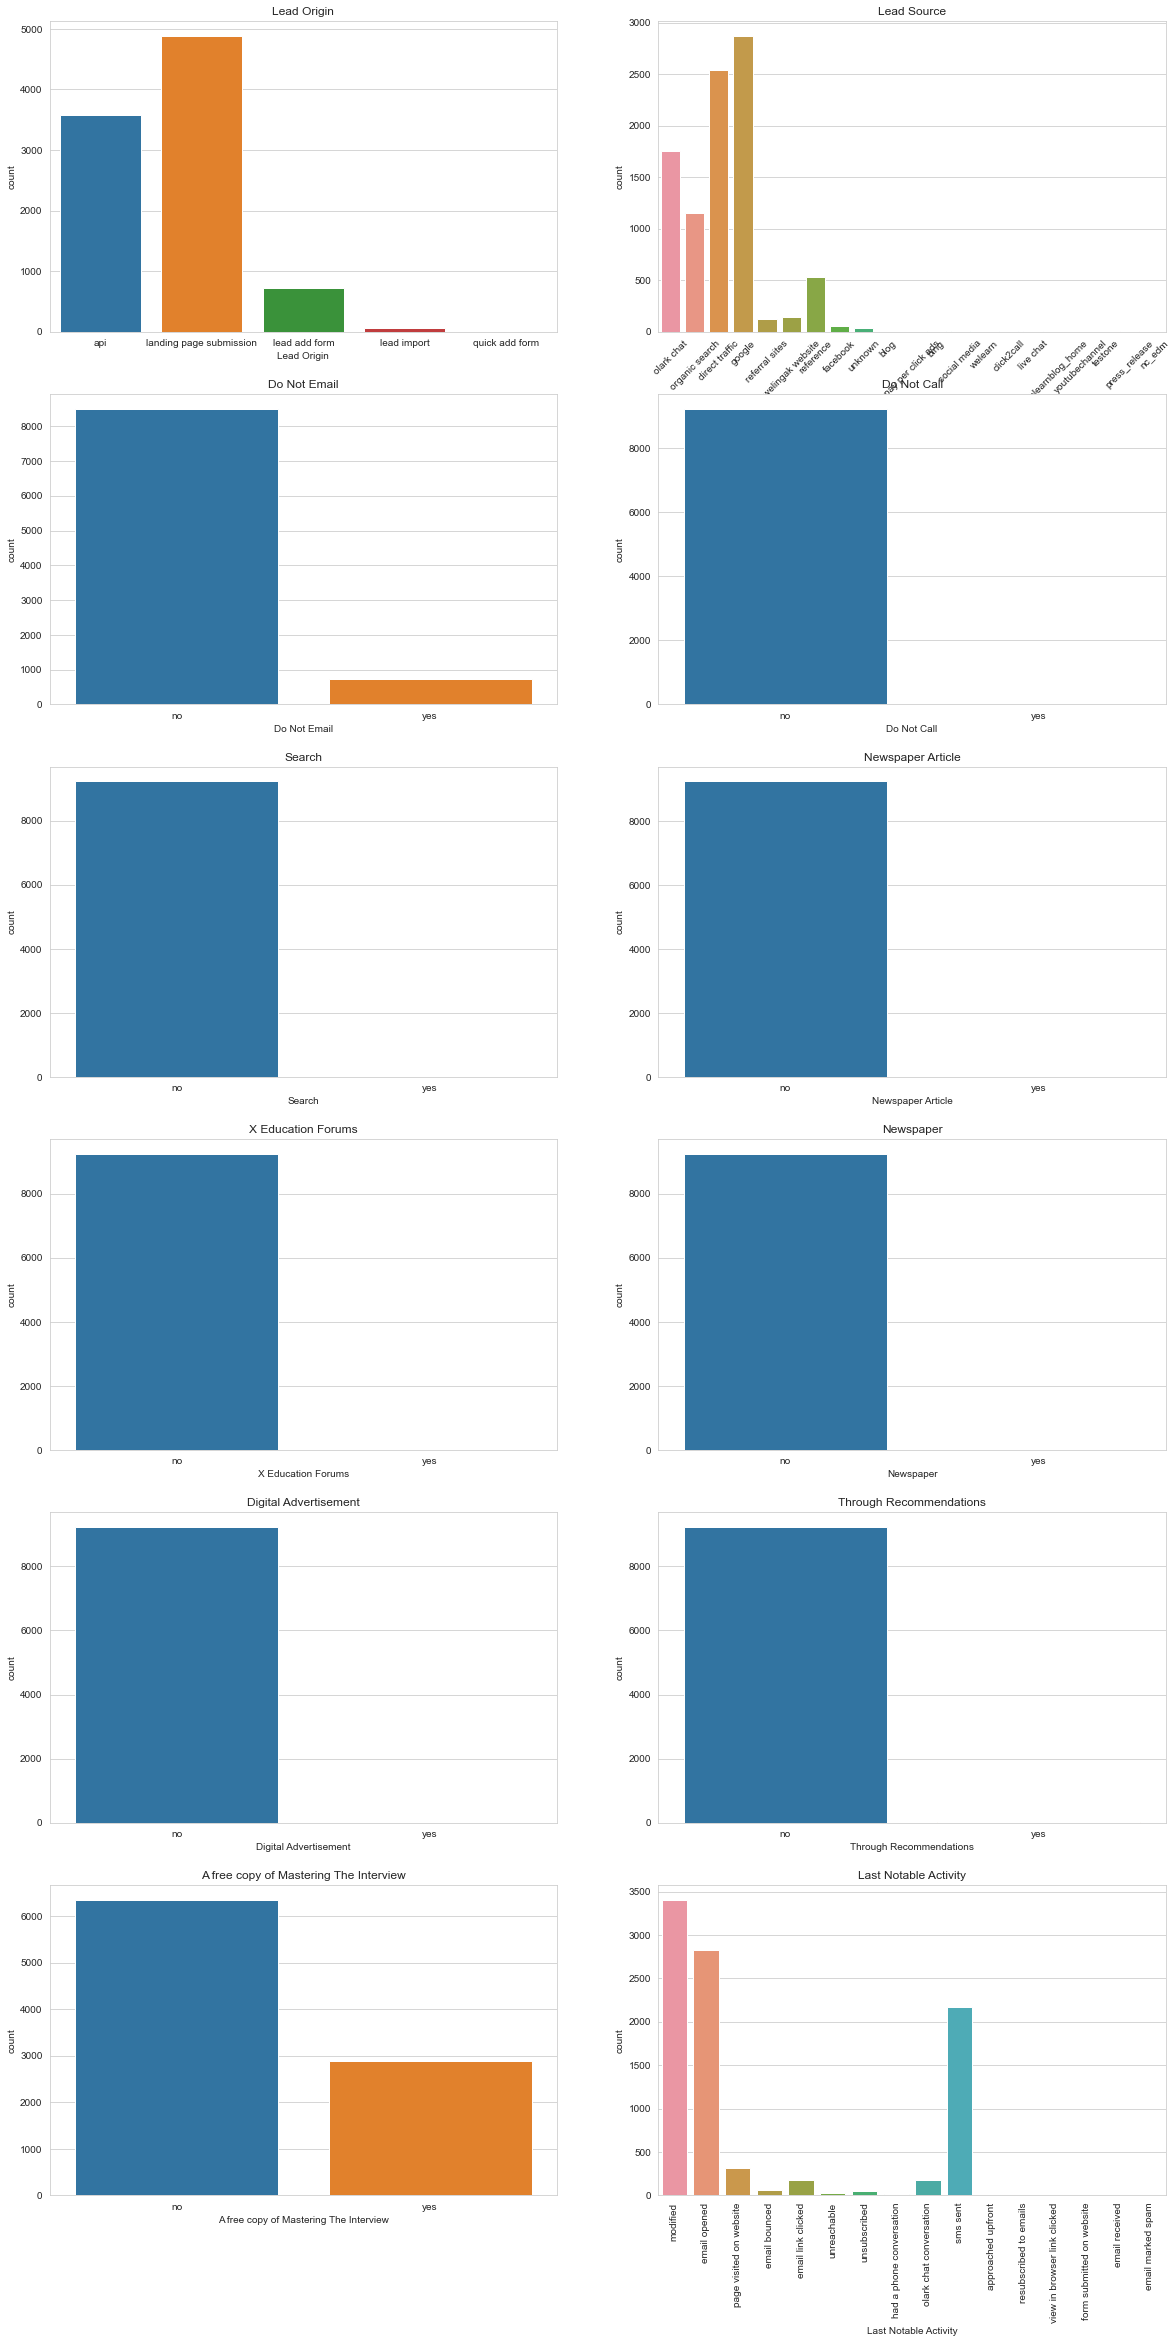

In [28]:
plt.figure(figsize = (20,40))
sns.set_style('whitegrid')

plt.subplot(6,2,1)
sns.countplot(lead_2['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_2['Lead Source'])
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(lead_2['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(lead_2['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(lead_2['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_2['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_2['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_2['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_2['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_2['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_2['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_2['Last Notable Activity'])
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Last Notable Activity')


plt.show()

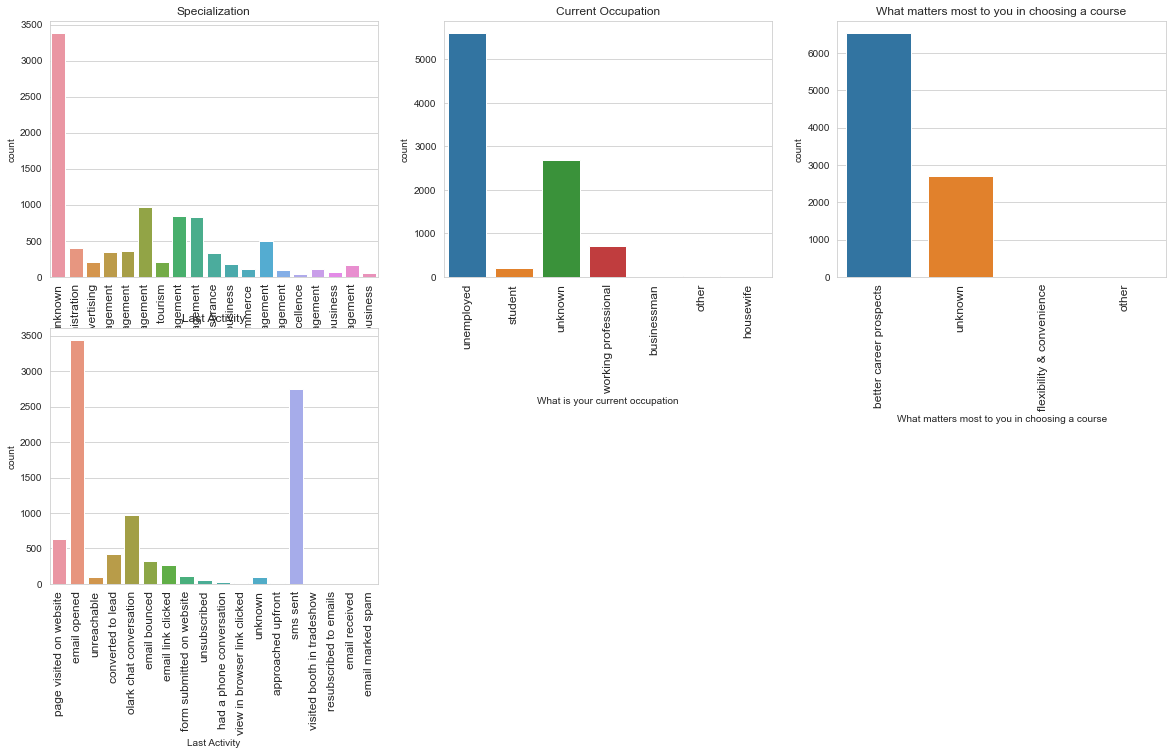

In [29]:
plt.figure(figsize = (20,16))


plt.subplot(3,3,1)
sns.countplot(lead_2['Specialization'])
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Specialization')

plt.subplot(3,3,2)
sns.countplot(lead_2['What is your current occupation'])
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Current Occupation')

plt.subplot(3,3,3)
sns.countplot(lead_2['What matters most to you in choosing a course'])
plt.xticks(rotation = 90, fontsize = 12)
plt.title('What matters most to you in choosing a course')

plt.subplot(3,3,4)
sns.countplot(lead_2['Last Activity'])
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Last Activity')
plt.show()

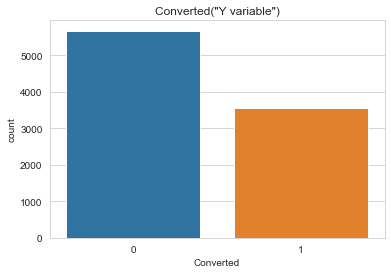

In [30]:
sns.countplot(lead_2['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Numerical Variable Analysis

In [31]:
lead_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

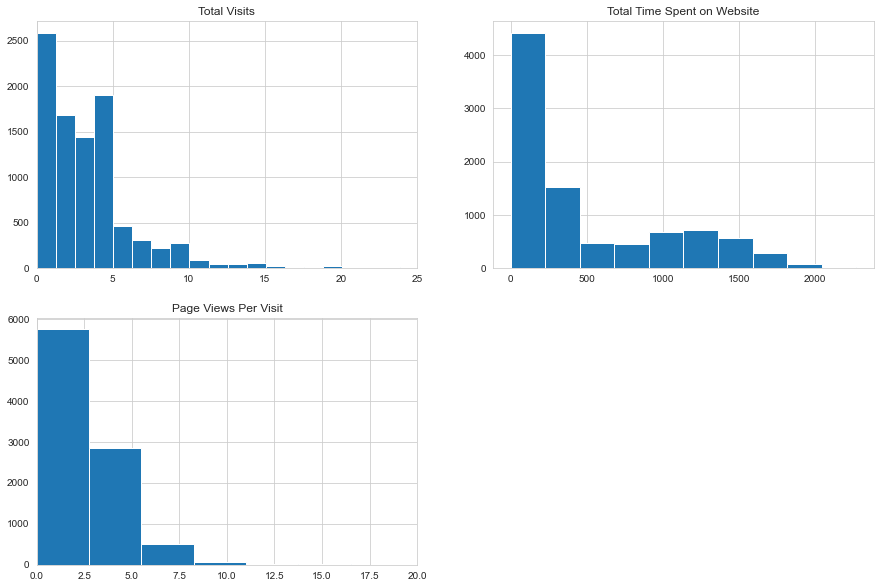

In [32]:
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.hist(lead_2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Relating all the categorical variables to target variable 'Converted'

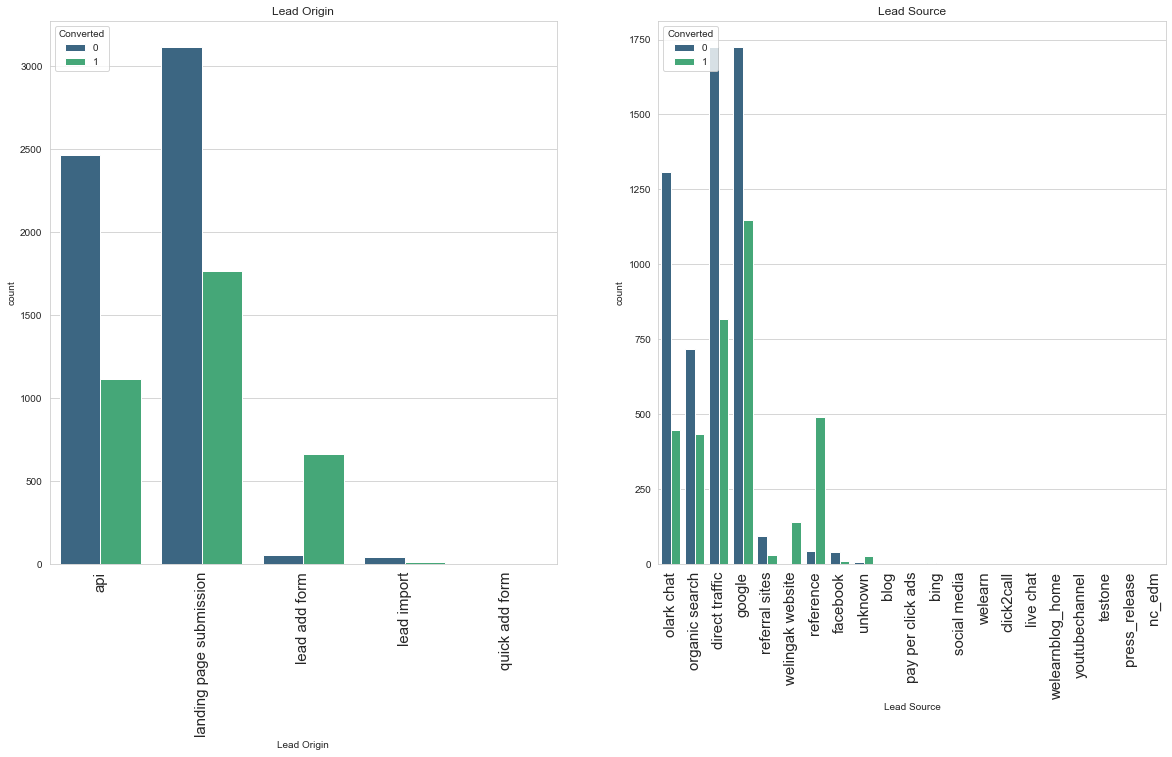

In [33]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_2, palette= 'viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted',palette= 'viridis', data= lead_2)
plt.xticks(rotation=90, fontsize=15)
plt.title('Lead Source')
plt.show()

1) From the above insights we can clearly see that most of the lead origin comes from Landing page form submission which denotes that there is some sort of interest in a customer.

2) Most of the lead source which are converted comes from google.

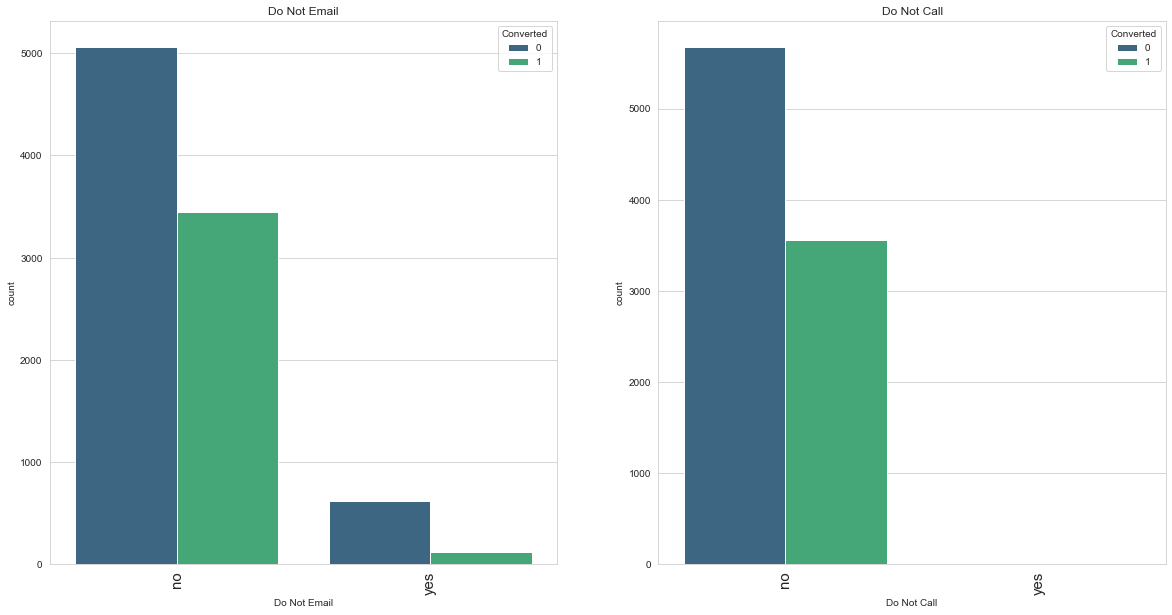

In [34]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_2, palette= 'viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Do Not Call')
plt.show()

From the above insights there is some conversion rate for Do not email.

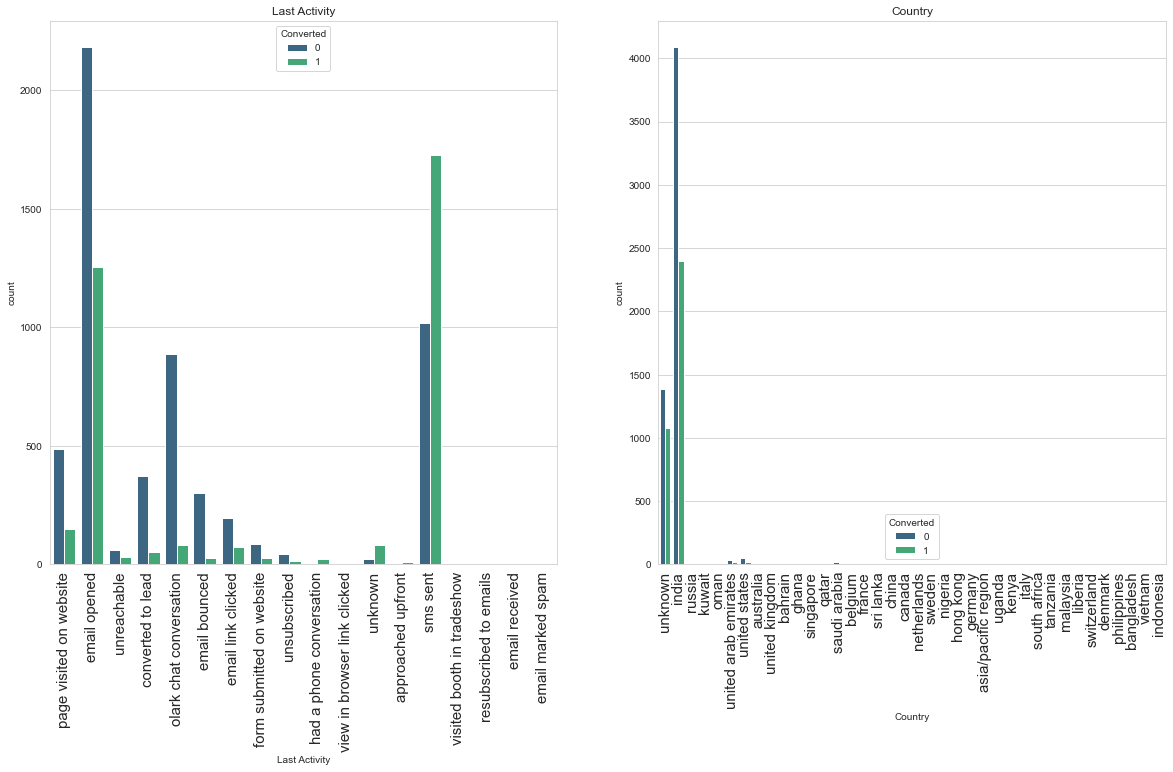

In [35]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Country')
plt.show()

1) Those who have read the sms most have converted into leads.

2) Most of the customers are from India.

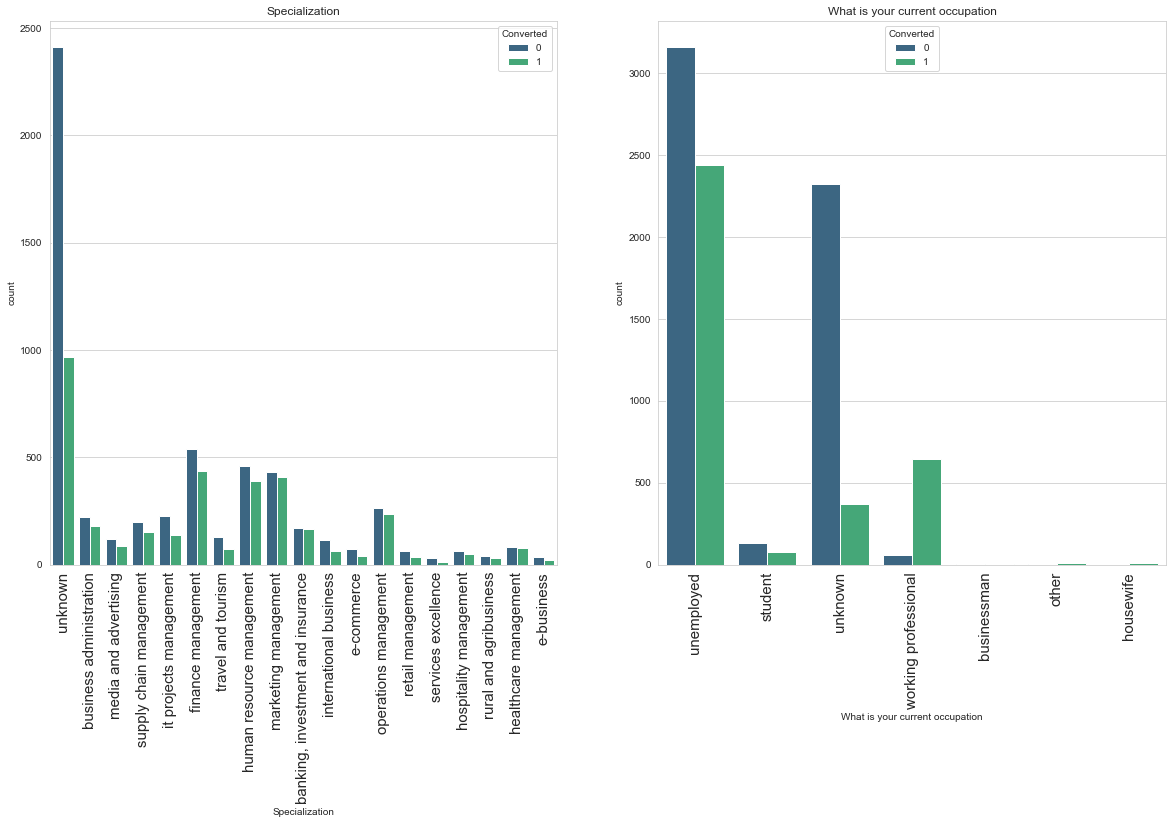

In [36]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('What is your current occupation')
plt.show()

1) Most of the courses by the people who are unemployed and want to upskill themselves.

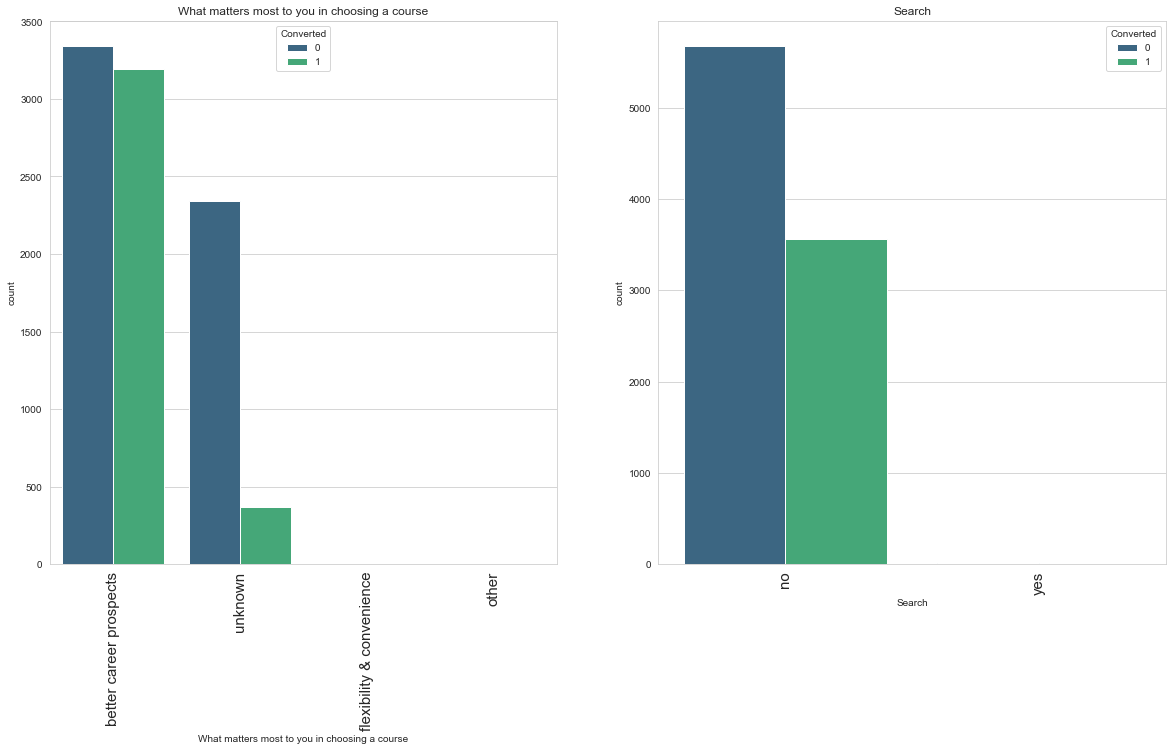

In [37]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Search')
plt.show()

1) Most of the leads have chosen the course for getting better career prospects in the future.

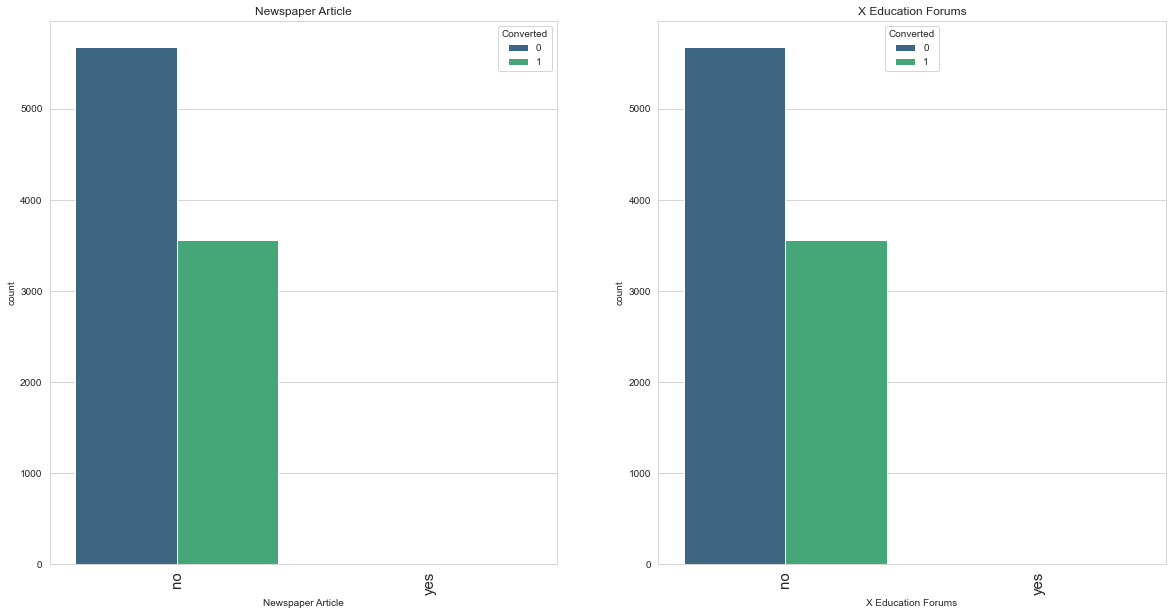

In [38]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_2,palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('X Education Forums')
plt.show()

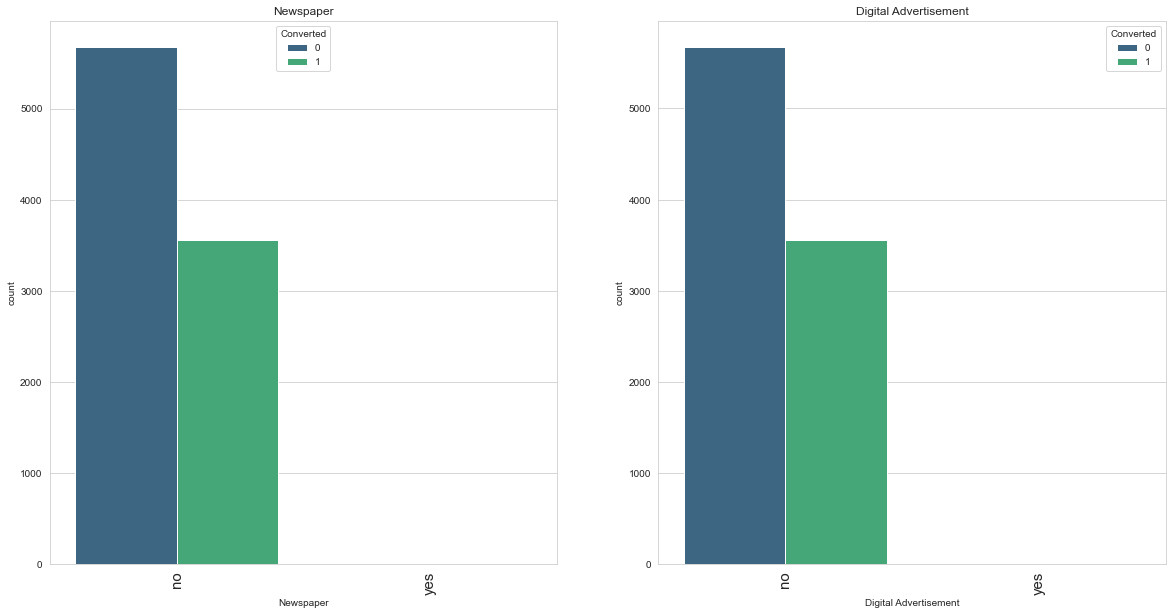

In [39]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_2,palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Digital Advertisement')
plt.show()

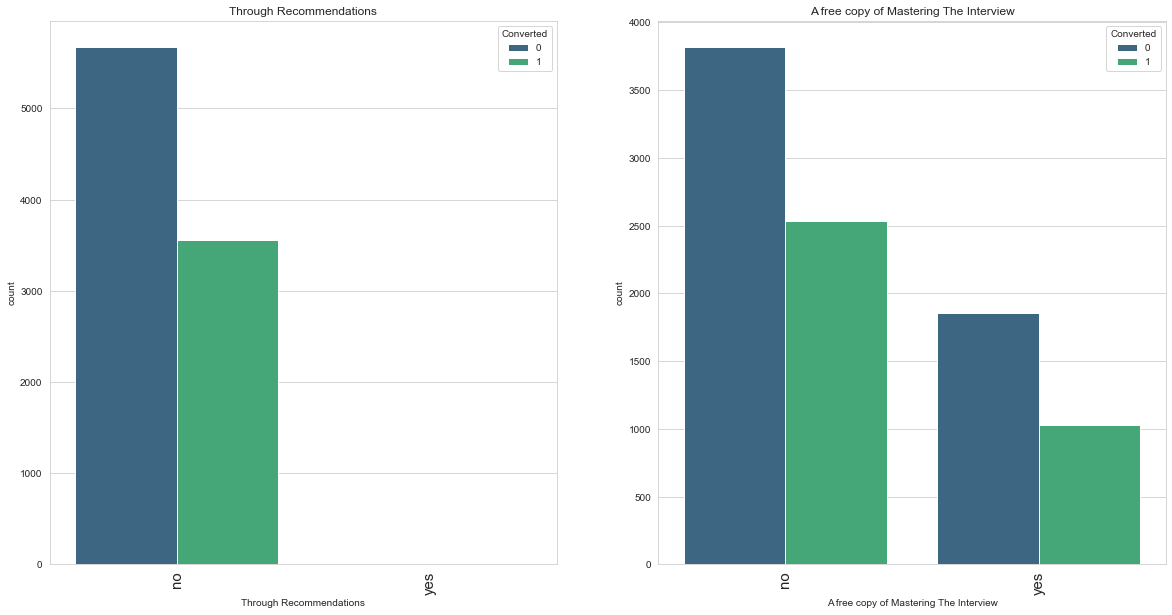

In [40]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('A free copy of Mastering The Interview')
plt.show()

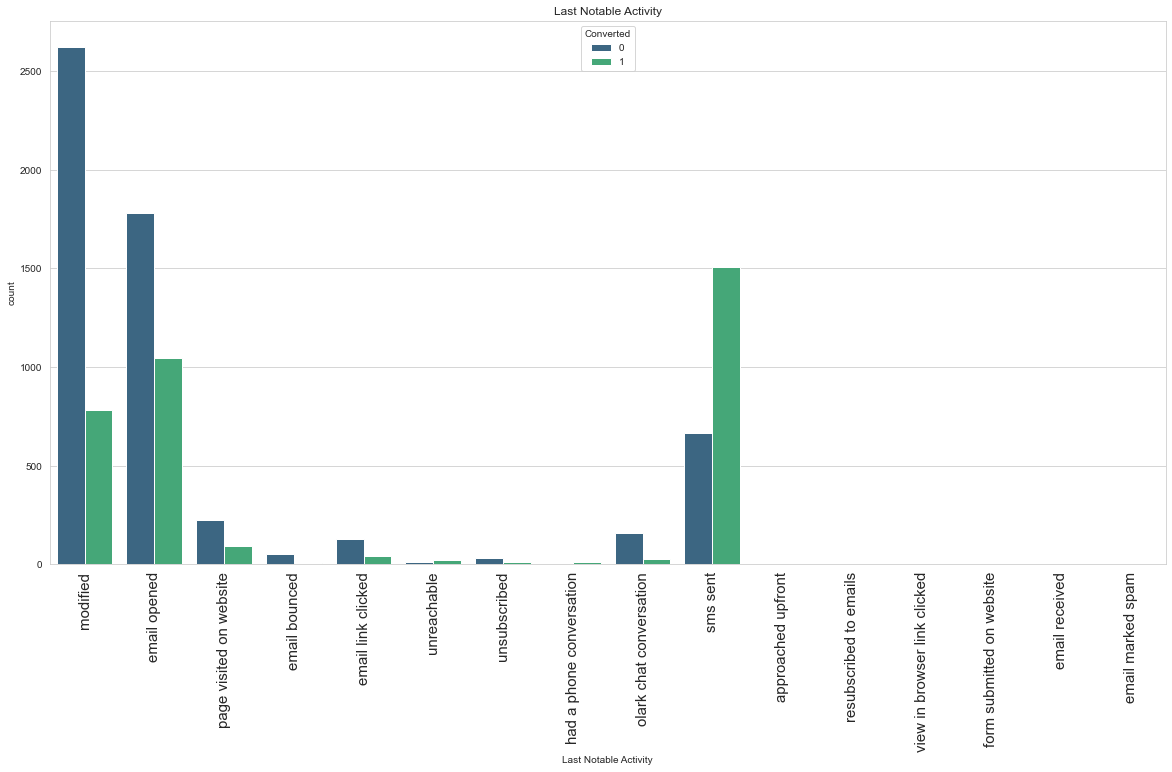

In [41]:
plt.figure(figsize = (20,10))

sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_2, palette='viridis')
plt.xticks(rotation=90, fontsize=15)
plt.title('Last Notable Activity')
plt.show()

In [42]:
# Checking the correlation

lead_2.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.029119,0.362483,-0.003294
TotalVisits,0.029119,1.000000,0.217341,0.512093
Total Time Spent on Website,0.362483,0.217341,1.000000,0.316262
Page Views Per Visit,-0.003294,0.512093,0.316262,1.000000


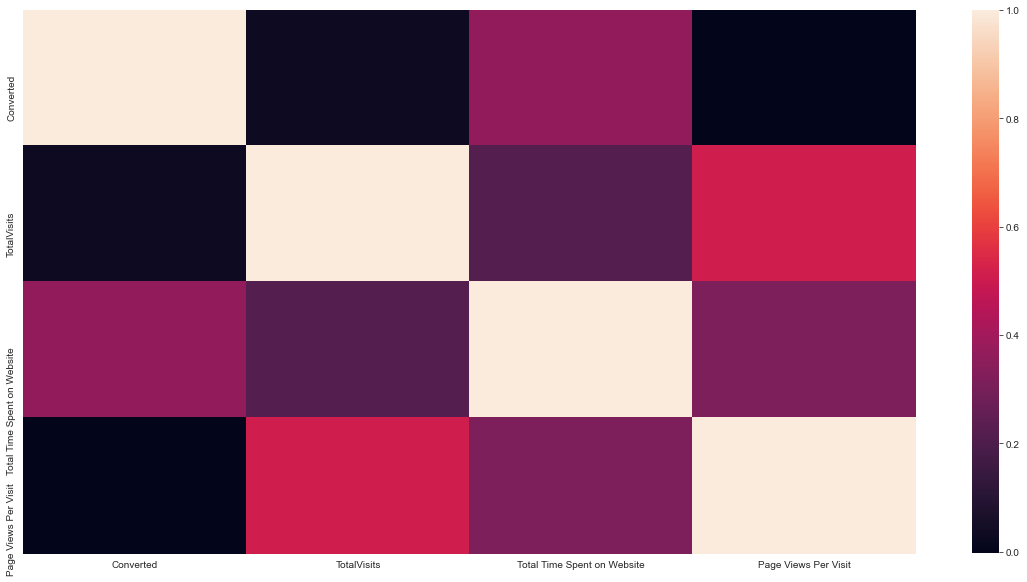

In [43]:
# Plotting the correlation on heatmap for better understanding
plt.figure(figsize=(20,10))
sns.heatmap(lead_2.corr())
plt.show()

## 5. Data Preparation

### 5.1 Dummy Variables Creation

In [44]:
lead_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [45]:
lead_2.loc[:,lead_2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
dummy = pd.get_dummies(lead_2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_3 = pd.concat([lead_2, dummy], axis=1)
lead_3

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,unknown,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [47]:
lead_3 = lead_3.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_3

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 5.2 Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Now we will split the target variable 'Converted' from the main dataframe

X = lead_3.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# Putting the target variable in y
y = lead_3['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# We are now splitting the data into 70% for train and 30% for testing purpose

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.3 Feature Scaling

In [52]:
# We will scale the three numerical features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 6. Model Building

In [53]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()

In [54]:
# Running RFE with 15 variables
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [55]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 43),
 ('Lead Origin_quick add form', False, 58),
 ('Specialization_business administration', False, 45),
 ('Specialization_e-business', False, 69),
 ('Specialization_e-commerce', False, 35),
 ('Specialization_finance management', False, 62),
 ('Specialization_healthcare management', False, 59),
 ('Specialization_hospitality management', False, 3),
 ('Specialization_human resource management', False, 50),
 ('Specialization_international business', False, 26),
 ('Specialization_it projects management', False, 61),
 ('Specialization_marketing management', False, 51),
 ('Specialization_media and advertising', False, 68),
 ('Specialization_operations management', False, 49),
 ('Specialization_retail management', False, 27),
 ('Specialization_rural and agribusin

In [56]:
# Keeping all the columns selected by RFE in the variable 'cols'
cols = X_train.columns[rfe.support_]

In [57]:
X_train = X_train[cols]

In [58]:
# Importing statsmodel library and VIF

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.8
Date:                Sun, 13 Nov 2022   Deviance:                       5347.7
Time:                        10:58:34   Pearson chi2:                 7.12e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7339      0.121     -6.082      0.000      -0.970      -0.497
TotalVisits                                              7.7239      2.113      3.655      0.000       3.582      11.866
Total Time Spent on Website                              4.0806      0.155     26.407      0.000       3.778       4.383
Page Views Per Visit                                    -5.9843      1.232     -4.857      0.000      -8.399      -3.570
Lead Origin_landing page submission                     -1.2531      0.121    -10.363      0.000      -1.490      -1.016
Lead Origin_lead add form                                2.3571      0.194     12.148      0.000       1.977       2.737
Specialization_unknown                                  -0.9968      0.121     -8.233      0.000      -1.234      -0.759
Lead Source_welingak website                             2.4376      0.746      3.268      0.001       0.976       3.899
Do Not Email_yes                                        -1.3222      0.165     -8.031      0.000      -1.645      -1.000
Last Activity_had a phone conversation                   0.6677      0.972      0.687      0.492      -1.236       2.572
Last Activity_sms sent                                   1.4608      0.073     19.898      0.000       1.317       1.605
What is your current occupation_housewife               22.7917   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_unknown                 -1.0912      0.086    -12.625      0.000      -1.261      -0.922
What is your current occupation_working professional     2.4259      0.189     12.850      0.000       2.056       2.796
Last Notable Activity_had a phone conversation           2.8353      1.493      1.899      0.058      -0.091       5.761
Last Notable Activity_unreachable                        1.9935      0.548      3.637      0.000       0.919       3.068
========================================================================================================================
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.43
3,Lead Origin_landing page submission,3.18
8,Last Activity_had a phone conversation,2.02
1,Total Time Spent on Website,2.01
13,Last Notable Activity_had a phone conversation,2.01
0,TotalVisits,1.85
5,Specialization_unknown,1.68
11,What is your current occupation_unknown,1.55
9,Last Activity_sms sent,1.51
4,Lead Origin_lead add form,1.41


**VIF values are well within the range of < 5. Some of the p-values exceed the limit of 0.05 we will drop them**

In [61]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [62]:
# Refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.8
Date:                Sun, 13 Nov 2022   Deviance:                       5351.6
Time:                        10:58:35   Pearson chi2:                 8.30e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7308      0.121     -6.061      0.000      -0.967      -0.494
TotalVisits                                              7.7981      2.113      3.690      0.000       3.656      11.940
Total Time Spent on Website                              4.0719      0.154     26.378      0.000       3.769       4.374
Page Views Per Visit                                    -6.0030      1.232     -4.874      0.000      -8.417      -3.589
Lead Origin_landing page submission                     -1.2524      0.121    -10.367      0.000      -1.489      -1.016
Lead Origin_lead add form                                2.3541      0.194     12.132      0.000       1.974       2.734
Specialization_unknown                                  -0.9998      0.121     -8.263      0.000      -1.237      -0.763
Lead Source_welingak website                             2.4416      0.746      3.274      0.001       0.980       3.904
Do Not Email_yes                                        -1.3273      0.165     -8.069      0.000      -1.650      -1.005
Last Activity_had a phone conversation                   2.1794      0.687      3.171      0.002       0.832       3.526
Last Activity_sms sent                                   1.4605      0.073     19.902      0.000       1.317       1.604
What is your current occupation_housewife               22.7905   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_unknown                 -1.0911      0.086    -12.627      0.000      -1.260      -0.922
What is your current occupation_working professional     2.4214      0.189     12.824      0.000       2.051       2.791
Last Notable Activity_unreachable                        1.9918      0.548      3.634      0.000       0.918       3.066
========================================================================================================================
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.43
3,Lead Origin_landing page submission,3.18
1,Total Time Spent on Website,2.01
0,TotalVisits,1.85
5,Specialization_unknown,1.68
11,What is your current occupation_unknown,1.55
9,Last Activity_sms sent,1.51
4,Lead Origin_lead add form,1.41
6,Lead Source_welingak website,1.26
12,What is your current occupation_working profes...,1.19


**We will now remove 'What is your current occupation_housewife' because it has high p-value.**

In [64]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [65]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.5
Date:                Sun, 13 Nov 2022   Deviance:                       5365.0
Time:                        10:58:35   Pearson chi2:                 8.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7219      0.120     -5.991      0.000      -0.958      -0.486
TotalVisits                                              7.7224      2.110      3.660      0.000       3.587      11.857
Total Time Spent on Website                              4.0705      0.154     26.392      0.000       3.768       4.373
Page Views Per Visit                                    -6.0336      1.231     -4.901      0.000      -8.446      -3.621
Lead Origin_landing page submission                     -1.2462      0.121    -10.325      0.000      -1.483      -1.010
Lead Origin_lead add form                                2.3689      0.194     12.224      0.000       1.989       2.749
Specialization_unknown                                  -1.0040      0.121     -8.302      0.000      -1.241      -0.767
Lead Source_welingak website                             2.4260      0.746      3.253      0.001       0.964       3.888
Do Not Email_yes                                        -1.3328      0.164     -8.103      0.000      -1.655      -1.010
Last Activity_had a phone conversation                   2.1716      0.687      3.160      0.002       0.825       3.518
Last Activity_sms sent                                   1.4528      0.073     19.815      0.000       1.309       1.596
What is your current occupation_unknown                 -1.0951      0.086    -12.682      0.000      -1.264      -0.926
What is your current occupation_working professional     2.4130      0.189     12.784      0.000       2.043       2.783
Last Notable Activity_unreachable                        1.9850      0.548      3.620      0.000       0.910       3.060
========================================================================================================================
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.43
3,Lead Origin_landing page submission,3.18
1,Total Time Spent on Website,2.01
0,TotalVisits,1.85
5,Specialization_unknown,1.68
10,What is your current occupation_unknown,1.55
9,Last Activity_sms sent,1.51
4,Lead Origin_lead add form,1.40
6,Lead Source_welingak website,1.26
11,What is your current occupation_working profes...,1.19


**Now all the VIFs and p-values are well within the range and we can proceed with the further steps.**

In [67]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.326974
6795    0.106932
3516    0.160244
8105    0.784756
3934    0.151112
4844    0.988928
3297    0.120845
8071    0.998740
987     0.191572
7423    0.920917
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32697352, 0.10693167, 0.16024365, 0.78475594, 0.15111225,
       0.9889282 , 0.12084493, 0.99874022, 0.19157153, 0.920917  ])

In [69]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.326974
1,0,0.106932
2,0,0.160244
3,0,0.784756
4,0,0.151112


In [70]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.326974,0
1,0,0.106932,0
2,0,0.160244,0
3,0,0.784756,1
4,0,0.151112,0


## 7. Model evaluation

In [71]:
# Importing required libraries

from sklearn import metrics

In [72]:
# Creating a confusion matrix

conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[3566,  436],
       [ 798, 1668]], dtype=int64)

In [73]:
# Checking the accuracy of model

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8092145949288806

**We got accuracy of 81% which is good.**

In [74]:
# Substituting the value of true positive
TP = conf[1,1]
# Substituting the value of true negatives
TN = conf[0,0]
# Substituting the value of false positives
FP = conf[0,1] 
# Substituting the value of false negatives
FN = conf[1,0]

In [75]:
# Calculating the sensitivity
TP/(TP+FN)

0.6763990267639902

In [76]:
# Calculating the specificity
TN/(TN+FP)

0.8910544727636182

## 7. Optimising cut-off with ROC curve

In [77]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

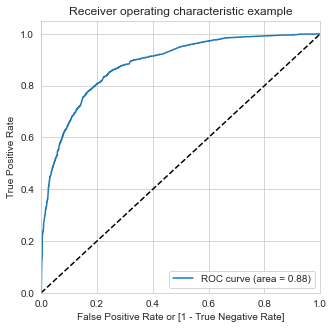

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [80]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.326974,0,1,1,1,1,0,0,0,0,0,0
1,0,0.106932,0,1,1,0,0,0,0,0,0,0,0
2,0,0.160244,0,1,1,0,0,0,0,0,0,0,0
3,0,0.784756,1,1,1,1,1,1,1,1,1,0,0
4,0,0.151112,0,1,1,0,0,0,0,0,0,0,0


In [81]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.596166,0.980130,0.359570
0.2,0.2,0.759740,0.896188,0.675662
0.3,0.3,0.793290,0.843877,0.762119
0.4,0.4,0.811534,0.778589,0.831834
0.5,0.5,0.809215,0.676399,0.891054
0.6,0.6,0.801948,0.606245,0.922539
0.7,0.7,0.783859,0.515410,0.949275
0.8,0.8,0.766543,0.436334,0.970015
0.9,0.9,0.713358,0.261557,0.991754


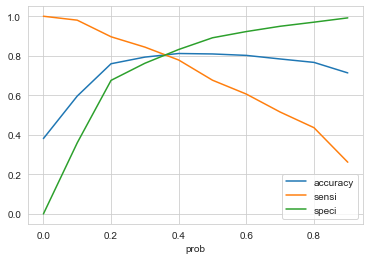

In [82]:
# Plotting the graph to get optimal cut-off
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**We got optimal cutoff value at 0.36**

In [83]:
# Now checking with optimal cut-off value which we got above

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.326974,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.106932,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.160244,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.784756,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.151112,0,1,1,0,0,0,0,0,0,0,0,0


In [84]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061224489795918

In [85]:
# Checking the confusion matrix

conf2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf2

array([[3566,  436],
       [ 798, 1668]], dtype=int64)

In [86]:
# Substituting the value of true positive
TP = conf2[1,1]
# Substituting the value of true negatives
TN = conf2[0,0]
# Substituting the value of false positives
FP = conf2[0,1] 
# Substituting the value of false negatives
FN = conf2[1,0]

In [87]:
# Calculating the sensitivity
TP/(TP+FN)

0.6763990267639902

In [88]:
# Calculating the specificity
TN/(TN+FP)

0.8910544727636182

In [89]:
# Calculate false postive rate - predicting conversions when leads has not converted

FP/ (TN+FP)

0.1089455272363818

In [90]:
# Positive predictive value 

TP /(TP+FP)

0.7927756653992395

In [91]:
# Negative predictive value

TN / (TN+ FN)

0.8171402383134739

### Precision and recall

In [92]:
conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
conf

array([[3566,  436],
       [ 798, 1668]], dtype=int64)

In [93]:
# Precision = TP / TP + FP
conf[1,1]/(conf[0,1]+conf[1,1])

0.7927756653992395

In [94]:
# Recall

conf[1,1]/(conf[1,0]+conf[1,1])

0.6763990267639902

### Precision and recall tradeoff

In [95]:
# Importing required libraries

from sklearn.metrics import precision_recall_curve

In [96]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

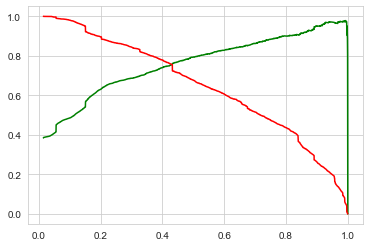

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [99]:
y_train_pred_final['Final Prediction'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Final Prediction
0,0,0.326974,0,1,1,1,1,0,0,0,0,0,0,0,0
1,0,0.106932,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.160244,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.784756,1,1,1,1,1,1,1,1,1,0,0,1,1
4,0,0.151112,0,1,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061224489795918

In [101]:
conf3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf3

array([[3247,  755],
       [ 499, 1967]], dtype=int64)

In [102]:
# Substituting the value of true positive
TP = conf3[1,1]
# Substituting the value of true negatives
TN = conf3[0,0]
# Substituting the value of false positives
FP = conf3[0,1] 
# Substituting the value of false negatives
FN = conf3[1,0]

In [103]:
# Precision 
TP / (TP + FP)

0.7226304188096988

In [104]:
# Recall
TP / (TP + FN)

0.7976480129764801

**With the current cutoff value of 0.42 we get precision of 74% and recall of 77% which is very good.**

## 8. Prediction on Test

In [105]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [106]:
# Substituting all the columns in the final train model
cols = X_train.columns

In [107]:
# Select the columns in X_train for X_test as well
X_test = X_test[cols]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Specialization_unknown,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_sms sent,What is your current occupation_unknown,What is your current occupation_working professional,Last Notable Activity_unreachable
4269,1.0,0.031873,0.444982,0.145455,0,0,1,0,0,0,1,1,0,0
2376,1.0,0.000000,0.000000,0.000000,0,1,1,0,0,0,1,0,0,0
7766,1.0,0.019920,0.025968,0.090909,0,0,0,0,0,0,0,0,1,1
9199,1.0,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0
4359,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.059761,0.127641,0.027273,1,0,0,0,0,0,0,1,0,0
2152,1.0,0.000000,0.000000,0.000000,0,1,1,0,0,0,1,0,0,0
7101,1.0,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0
5331,1.0,0.011952,0.707746,0.054545,1,0,0,0,1,0,0,1,0,0


In [108]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.453021
1,1,0.890486
2,1,0.967298
3,0,0.151112
4,1,0.838480


In [109]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

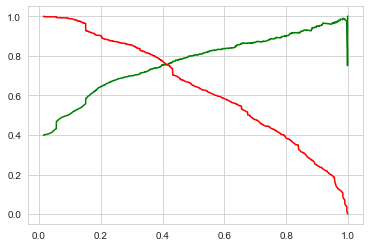

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
# Making prediction using cut off 0.16
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.453021,1
1,1,0.890486,1
2,1,0.967298,1
3,0,0.151112,0
4,1,0.838480,1
...,...,...,...
2767,0,0.095627,0
2768,1,0.890486,1
2769,0,0.151112,0
2770,0,0.147800,0


In [118]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8073593073593074

**We are getting test accuracy of 81% which indicates that our model has generalized well**

In [119]:
conf4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
conf4

array([[1409,  268],
       [ 266,  829]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = conf4[1,1]
# Substituting the value of true negatives
TN = conf4[0,0]
# Substituting the value of false positives
FP = conf4[0,1] 
# Substituting the value of false negatives
FN = conf4[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7556973564266181

In [122]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7570776255707763

In [126]:
# Specificity
TN / (TN+FP)

0.840190816935003

In [125]:
# Sensitivity
TP / (TP+FN)

0.7570776255707763

## 9. Conclusion

1) While checking for Sensitivity-Specificity as well as Precision and Recall Metrics, we also thought about the best cutoff        based on Sensitivity and Specificity when determining the final forecast.

2) The test set's accuracy, sensitivity, and specificity values are roughly 81%, 75%, and 84%, which are closer to the              corresponding figures derived using the training set.

3) Additionally, according to the lead score computed using the trained set of data, the final predicted model's conversion rate    is about 80%, therefore altogether this model appears to be effective.